# Application on paleoceanographic data (ODP1148)

## 1. Reading the data and initializing Wavepal

Start importing wavepal and other usual packages

In [1]:
% matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import copy
import wavepal as wv

In [2]:
mypath="../figures/ODP1148_example/"

Read the data

In [3]:
data=np.genfromtxt("data/ODP1148-BF-18O.txt")
myt=data[:,0]
mydata=data[:,1]

Initialize the class called Wavepal (which is a class of the package wv)

In [4]:
x=wv.Wavepal(myt, mydata, "Age", "$\delta{}^{18}O$", t_units="ka", mydata_units="permil")

## 2. Preliminary analysis

Check the data set

In [5]:
x.check_data()

Figure of the time step in function of time, with an histogram of the distribution of the time steps

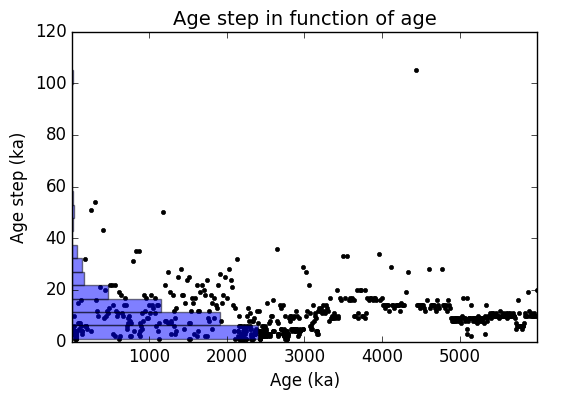

In [6]:
plot_timestep=x.plot_timestep(nbins=20)
plot_timestep.title("Age step in function of age",fontsize=14)
plot_timestep.savefig(mypath+"timestep.pdf")
plot_timestep.show()

Figure of the trend.

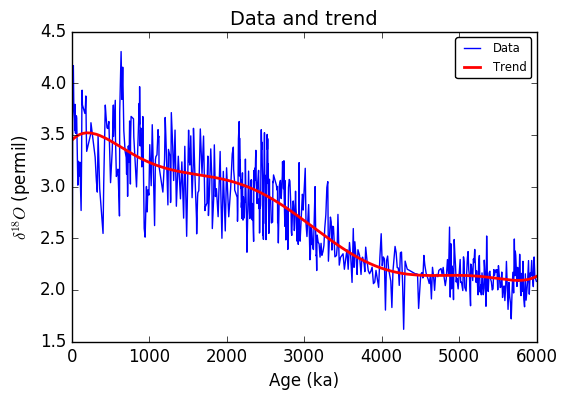

In [7]:
plot_trend=x.plot_trend(pol_degree=7)  
plot_trend.title("Data and trend",fontsize=14)
plot_trend.savefig(mypath+"data_and_trend.pdf")
plot_trend.show()

and choose the degree of the polynomial for the subsequent analyses

In [8]:
x.choose_trend_degree(7)

Compute some variables related to the trend

In [9]:
x.trend_vectors()

## 3. CARMA(p,q) Background Noise Analysis

In [10]:
# Analytical + MCMC with median carma parameters
x.carma_params(signif_level_type="a",make_carma_fig=True,nbins=15,dpi=400,path_to_figure_folder=mypath+"carma_analytic/")
# Do some tricks to perform MCMC significance levels with a red noise of FIXED parameters (this is not provided by WAVEPAL by default)
x.nmcmc=50000
from gen_car1_wv33 import gen_car1
x.myn=gen_car1(x.t,x.alpha_unique[0]*np.ones(50000),x.sigwn_unique*np.ones(50000))
x.signif_level_type="an"

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  14

SECOND ROUND: generates  14000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...
Plotting parameter summary
Plotting parameter summary
Plotting parameter summary
Plotting parameter summary
Decorrelation length (in number of samples):  17
**************************************
*        BUILD CARMA MATRIX K        *
**************************************
Computing the median parameters of the CAR-1 process from  824  MCMC samples.
Median parameters:
--------------------
alpha:  0.168406745899
std white noise:  0.149344888052


In [11]:
# Full MCMC, taking into account the uncertainty on the parameters of the red noise
y=copy.copy(x)
y.carma_params(signif_level_type="an",nmcmc=50000,nbins=15)  

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  17

SECOND ROUND: generates  850000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...

  0%|          | 0/1 [00:00<?, ?it/s]


Decorrelation length (in number of samples):  12
*******************************************************************************
*        BUILD CARMA MATRIX K AND THE CARMA MATRIX WITH MCMC SAMPLES		     *
*******************************************************************************
Generation of  50000  CAR-1 samples in order to estimate the confidence levels


100%|██████████| 1/1 [00:04<00:00,  4.39s/it]


Computing the median parameters of the CAR-1 process from  50000  MCMC samples.
Median parameters:
--------------------
alpha:  0.169452260998
std white noise:  0.149563255023


## 4. Frequency Analysis

Choose the $\textrm{x}^{\textrm{th}}$ percentiles for significance testing

In [12]:
percentile=np.zeros(2)
percentile[0]=95.
percentile[1]=99.9

Run the method for the frequency analysis

Frequency analysis with confidence levels coming from the median parameters of the red noise

In [13]:
x.freq_analysis(freqstep=0.0001,D=600.,percentile=percentile,n_moments=12,computes_amplitude=True,mywindow=8)

  0%|          | 0/529 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0544705112891 
Main loop, over the frequencies:


100%|██████████| 529/529 [03:14<00:00,  6.26it/s]


Frequency analysis with confidence levels taking into account the distribution of the parameters of the red noise

In [14]:
y.freq_analysis(freqstep=0.0001,D=600.,percentile=percentile,n_moments=12,mywindow=8)

  0%|          | 0/529 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0544705112891 
Main loop, over the frequencies:


100%|██████████| 529/529 [05:03<00:00,  5.59it/s]


WOSA segmentation

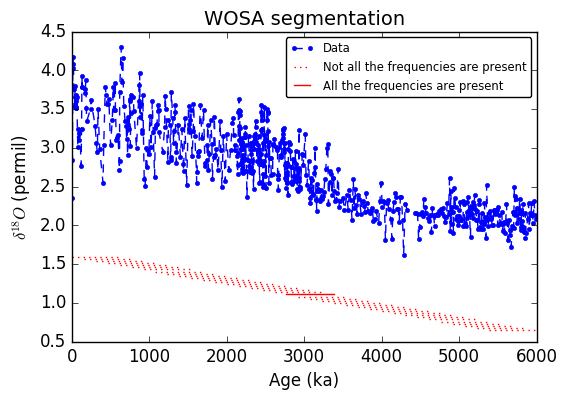

In [15]:
plot_WOSA_segmentation=x.plot_WOSA_segmentation()
plot_WOSA_segmentation.title("WOSA segmentation",fontsize=14)
plot_WOSA_segmentation.savefig(mypath+"WOSA_segmentation.pdf")
plot_WOSA_segmentation.show()

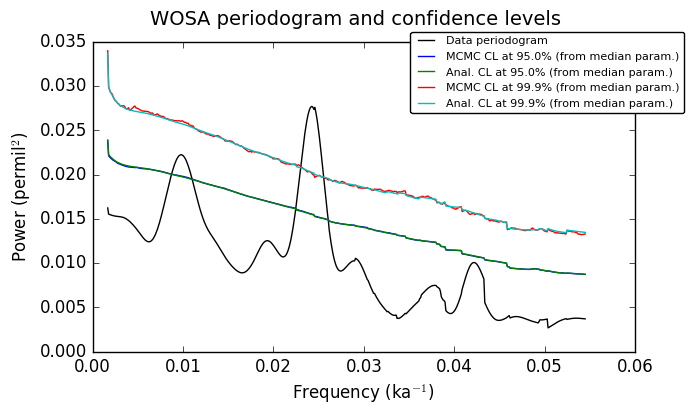

In [16]:
# Frequency analysis with confidence levels coming from the median parameters of the red noise
plt.plot(x.freq,x.periodogram,"k",label="Data periodogram",linewidth=1.)
for k in range(x.percentile.size):
    plt.plot(x.freq,x.periodogram_cl_mcmc[:,k],label="MCMC CL at "+str(x.percentile[k])+"%"+" (from median param.)",linewidth=1)
    plt.plot(x.freq,x.periodogram_cl_anal[:,k],label="Anal. CL at "+str(x.percentile[k])+"%"+" (from median param.)",linewidth=1)
plt.legend(fancybox=True,fontsize=8,bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Frequency"+" (ka${}^{-1}$)",fontsize=12)
plt.ylabel("Power"+" (permil${}^{2}$)",fontsize=12)
plt.suptitle("WOSA periodogram and confidence levels", fontsize=14)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.savefig(mypath+"periodogram_median_params.pdf")
plt.show()

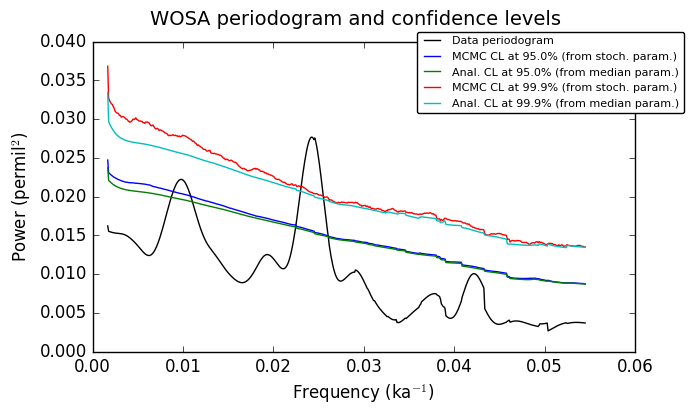

In [17]:
# Frequency analysis with confidence levels taking into account the distribution of the parameters of the red noise
plot_periodogram=y.plot_periodogram(fontsize_legend=8)
plot_periodogram.suptitle("WOSA periodogram and confidence levels", fontsize=14)
fig = plt.gcf()
fig.set_size_inches(7, 4)
plot_periodogram.savefig(mypath+"periodogram_distr_params.pdf")
plot_periodogram.show()

In [18]:
del y

Number of WOSA segments per frequency 

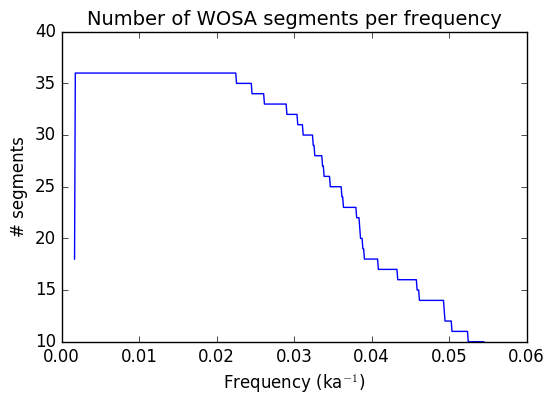

In [19]:
plot_number_WOSA_segments=x.plot_number_WOSA_segments()
plot_number_WOSA_segments.savefig(mypath+"number_WOSA_segments_per_frequency.pdf")
plot_number_WOSA_segments.show()

Check the convergence of the analytical confidence levels

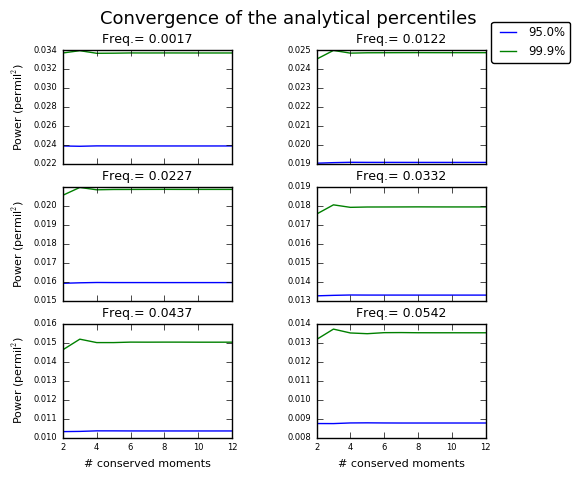

In [20]:
plot_check_convergence_percentiles=x.plot_check_convergence_percentiles(fontsize_suptitle=13,fontsize_title=9,fontsize_axes=8,fontsize_ticks=6)
fig = plt.gcf()
fig.set_size_inches(6,5)
plot_check_convergence_percentiles.savefig(mypath+"check_convergence_percentiles.pdf")
plot_check_convergence_percentiles.show()

Compare the squared amplitude vs the periodogram

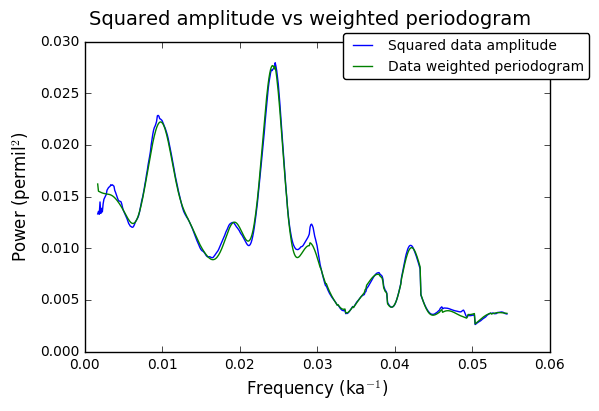

In [21]:
plot_amplitude_vs_periodogram=x.plot_amplitude_vs_periodogram(fontsize_legend=10)
plot_amplitude_vs_periodogram.suptitle("Squared amplitude vs weighted periodogram", fontsize=14)
plot_amplitude_vs_periodogram.savefig(mypath+"amplitude_vs_periodogram.pdf")
plot_amplitude_vs_periodogram.show()

## 5. Sensitivity analysis for the trend degree

In [22]:
x.signif_level_type=""

In [23]:
x.choose_trend_degree(5)
x.trend_vectors()
x.freq_analysis(freqstep=0.0001,D=600.,mywindow=8)
trend5=x.trend
freq5=x.freq
periodogram5=x.periodogram

  0%|          | 0/529 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0544705112891 
Main loop, over the frequencies:


100%|██████████| 529/529 [00:05<00:00, 96.64it/s] 


In [24]:
x.choose_trend_degree(6)
x.trend_vectors()
x.freq_analysis(freqstep=0.0001,D=600.,mywindow=8)
trend6=x.trend
freq6=x.freq
periodogram6=x.periodogram

  0%|          | 0/529 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0544705112891 
Main loop, over the frequencies:


100%|██████████| 529/529 [00:05<00:00, 92.27it/s] 


In [25]:
x.choose_trend_degree(7)
x.trend_vectors()
x.freq_analysis(freqstep=0.0001,D=600.,mywindow=8)
trend7=x.trend
freq7=x.freq
periodogram7=x.periodogram

  0%|          | 0/529 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0544705112891 
Main loop, over the frequencies:


100%|██████████| 529/529 [00:06<00:00, 84.03it/s] 


In [26]:
x.choose_trend_degree(8)
x.trend_vectors()
x.freq_analysis(freqstep=0.0001,D=600.,mywindow=8)
trend8=x.trend
freq8=x.freq
periodogram8=x.periodogram

  0%|          | 0/529 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0544705112891 
Main loop, over the frequencies:


100%|██████████| 529/529 [00:06<00:00, 79.11it/s] 


In [27]:
x.choose_trend_degree(9)
x.trend_vectors()
x.freq_analysis(freqstep=0.0001,D=600.,mywindow=8)
trend9=x.trend
freq9=x.freq
periodogram9=x.periodogram

  0%|          | 0/529 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0544705112891 
Main loop, over the frequencies:


100%|██████████| 529/529 [00:06<00:00, 75.72it/s] 


In [28]:
x.choose_trend_degree(10)
x.trend_vectors()
x.freq_analysis(freqstep=0.0001,D=600.,mywindow=8)
trend10=x.trend
freq10=x.freq
periodogram10=x.periodogram

  0%|          | 0/529 [00:00<?, ?it/s]

Re-estimated D factor (WOSA):  614.461538462
Preliminary steps for the WOSA periodogram:
Re-estimated frequency range: from  0.00166701633082  to  0.0544705112891 
Main loop, over the frequencies:


100%|██████████| 529/529 [00:07<00:00, 68.85it/s] 


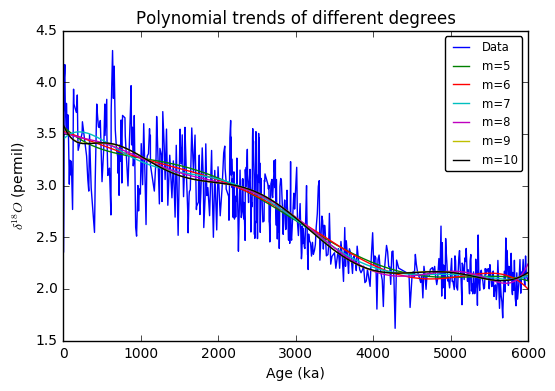

In [29]:
plt.plot(x.t,mydata,label="Data")
plt.plot(x.t,trend5,label="m=5")
plt.plot(x.t,trend6,label="m=6")
plt.plot(x.t,trend7,label="m=7")
plt.plot(x.t,trend8,label="m=8")
plt.plot(x.t,trend9,label="m=9")
plt.plot(x.t,trend10,label="m=10")
plt.xlabel("Age (ka)")
plt.ylabel("$\delta{}^{18}O$ (permil)")
plt.title("Polynomial trends of different degrees")
plt.legend(fancybox=True,fontsize='small')
plt.savefig(mypath+"comparison_trends_ts.pdf")
plt.show()

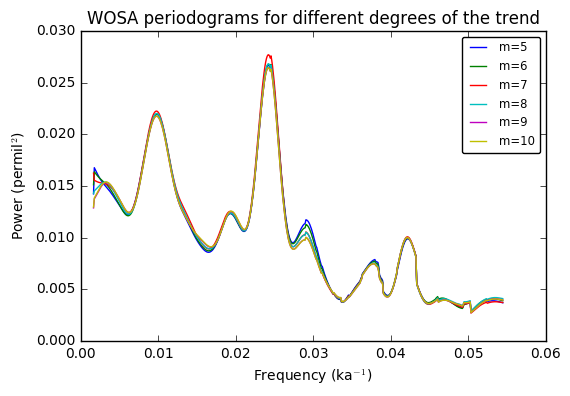

In [30]:
plt.plot(freq5,periodogram5,label="m=5")
plt.plot(freq6,periodogram6,label="m=6")
plt.plot(freq7,periodogram7,label="m=7")
plt.plot(freq8,periodogram8,label="m=8")
plt.plot(freq9,periodogram9,label="m=9")
plt.plot(freq10,periodogram10,label="m=10")
plt.xlabel("Frequency"+" (ka${}^{-1}$)")
plt.ylabel("Power"+" (permil${}^{2}$)")
plt.title("WOSA periodograms for different degrees of the trend")
plt.legend(fancybox=True,fontsize='small')
plt.savefig(mypath+"comparison_trends_periodogram.pdf")
plt.show()